In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.shape

(1000, 8)

In [6]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['average'] = data['total_score']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = data[data['reading score'] == 100]['average'].count()
writing_full = data[data['writing score'] == 100]['average'].count()
math_full = data[data['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [22]:
reading_less_20 = data[data['reading score'] <= 20]['average'].count()
writing_less_20 = data[data['writing score'] <= 20]['average'].count()
math_less_20 = data[data['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

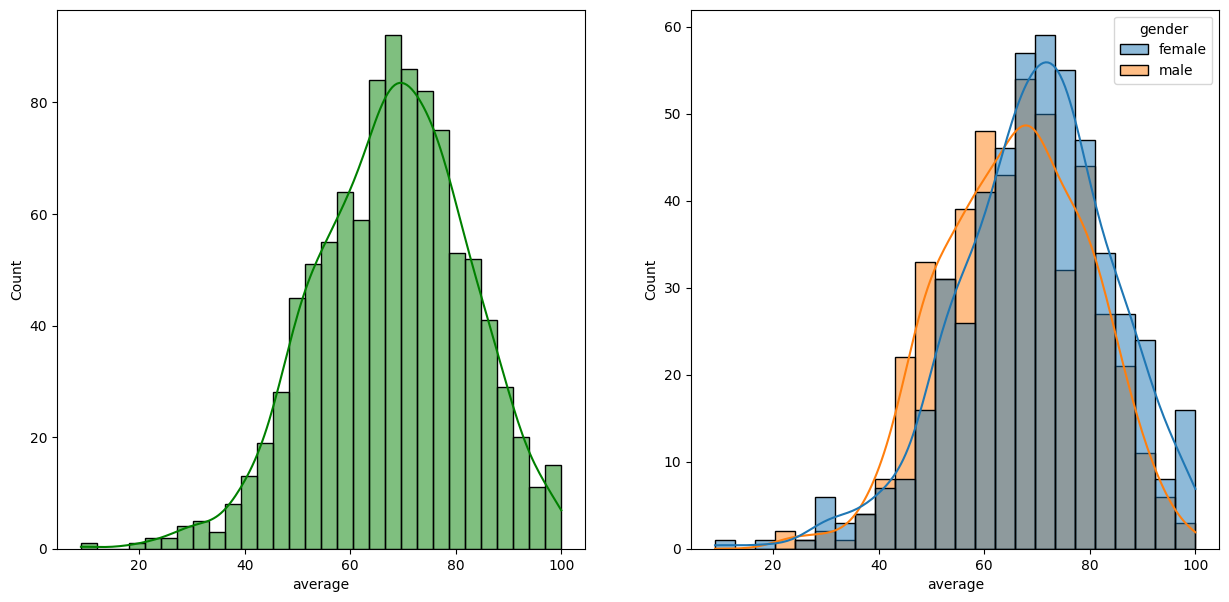

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='average',kde=True,hue='gender')
plt.show()

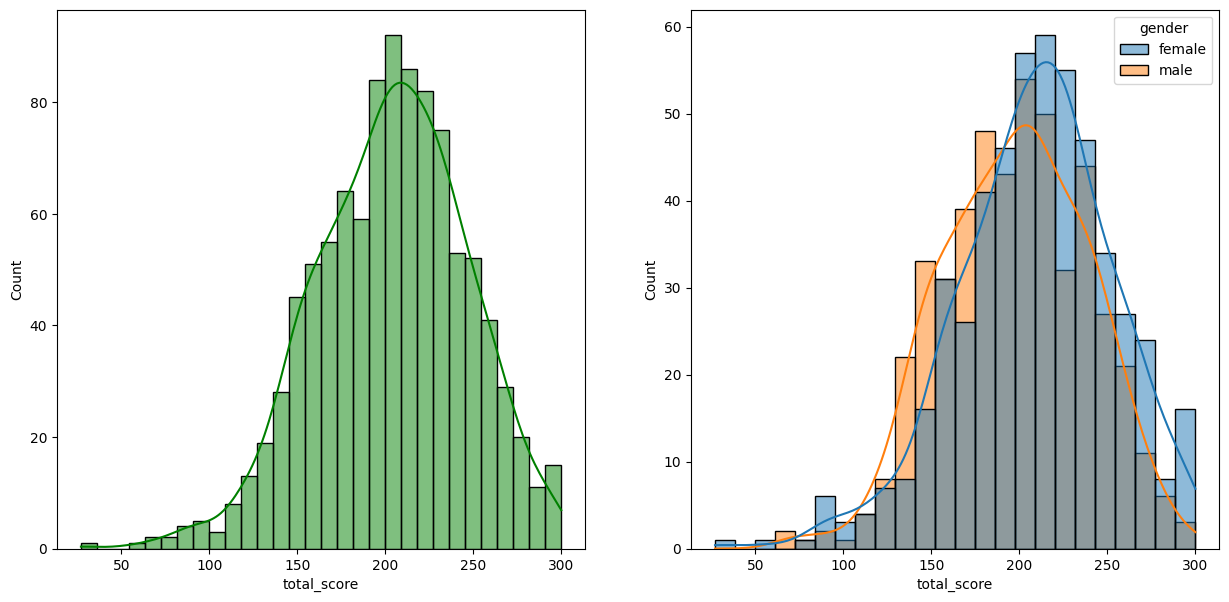

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='total_score',kde=True,hue='gender')
plt.show()

# Insights
* Female students tend to perform better then male students.

# Helper Function

In [41]:
def plots(x,hue):
  plt.subplots(1,3,figsize=(25,6))
  plt.subplot(141)
  sns.histplot(data=data,x=x,kde=True,hue=hue).set(title='Overall')
  plt.subplot(142)
  sns.histplot(data=data[data.gender=='female'],x=x,kde=True,hue=hue).set(title='Female')
  plt.subplot(143)
  sns.histplot(data=data[data.gender=='male'],x=x,kde=True,hue=hue).set(title='Male')
  plt.show()

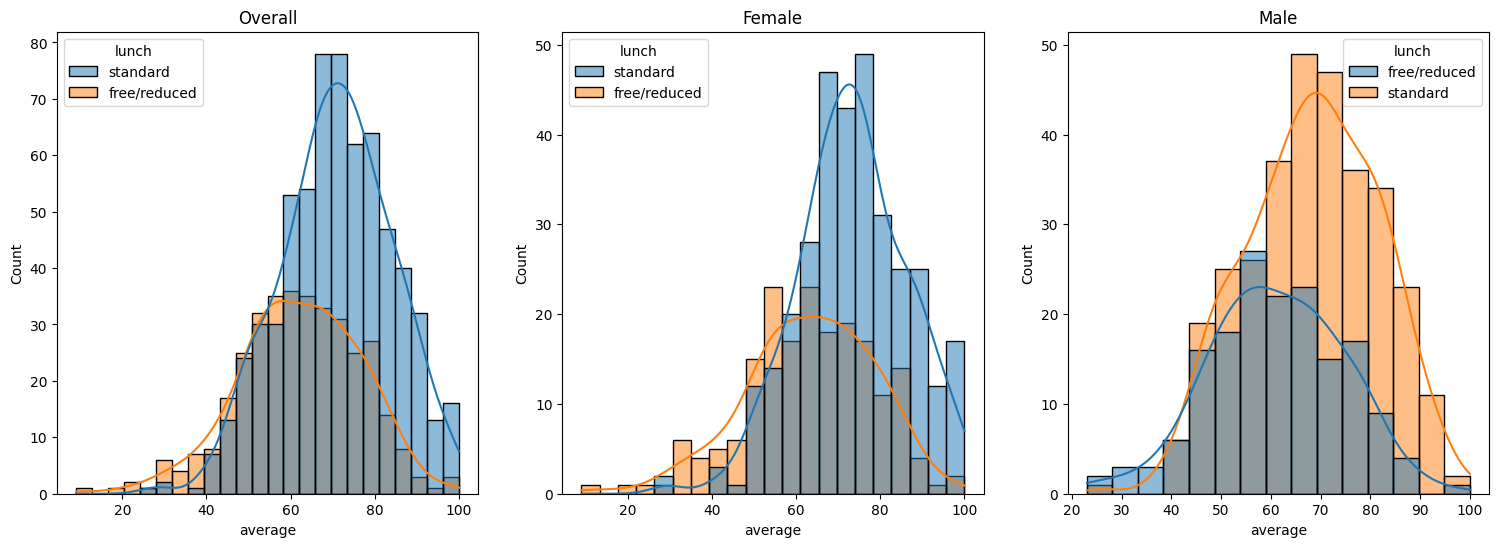

In [42]:
plots(x='average',hue='lunch')

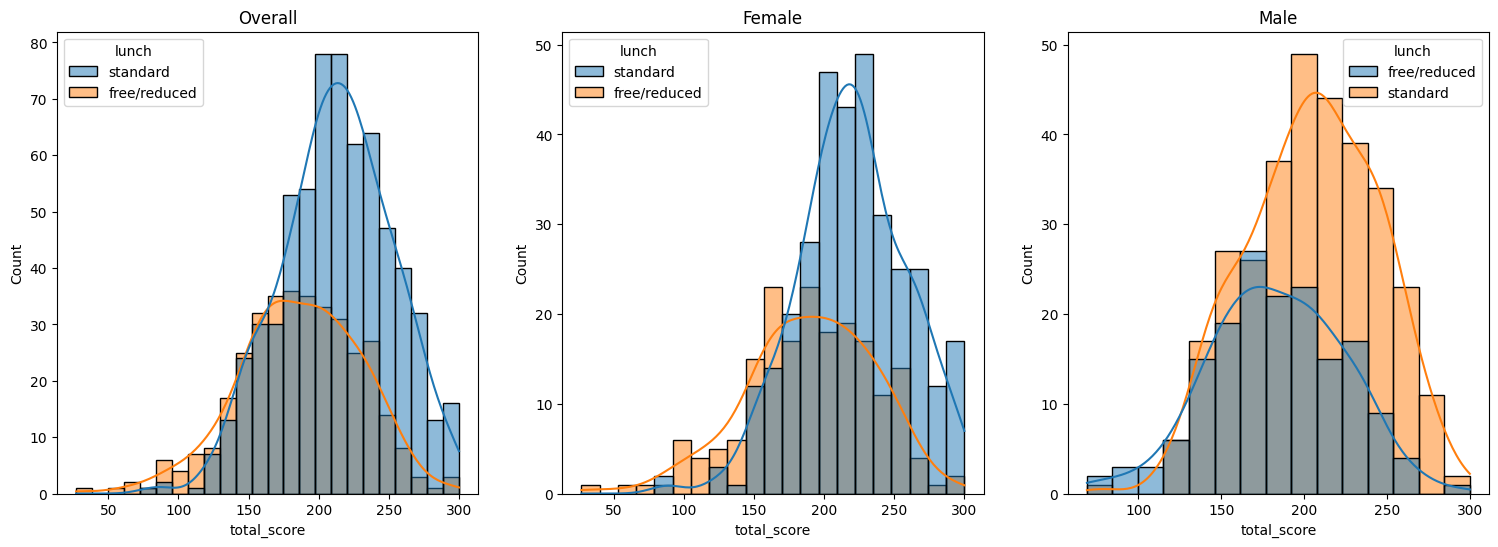

In [43]:
plots(x='total_score',hue='lunch')

# Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

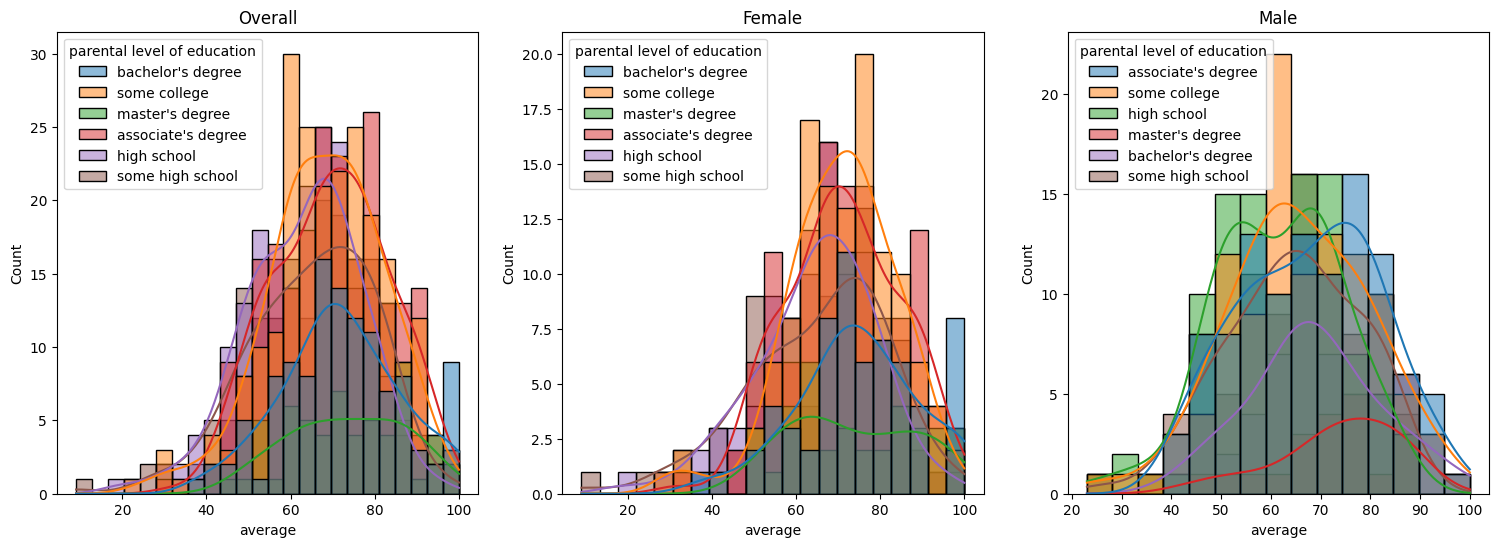

In [45]:
plots(x='average',hue='parental level of education')

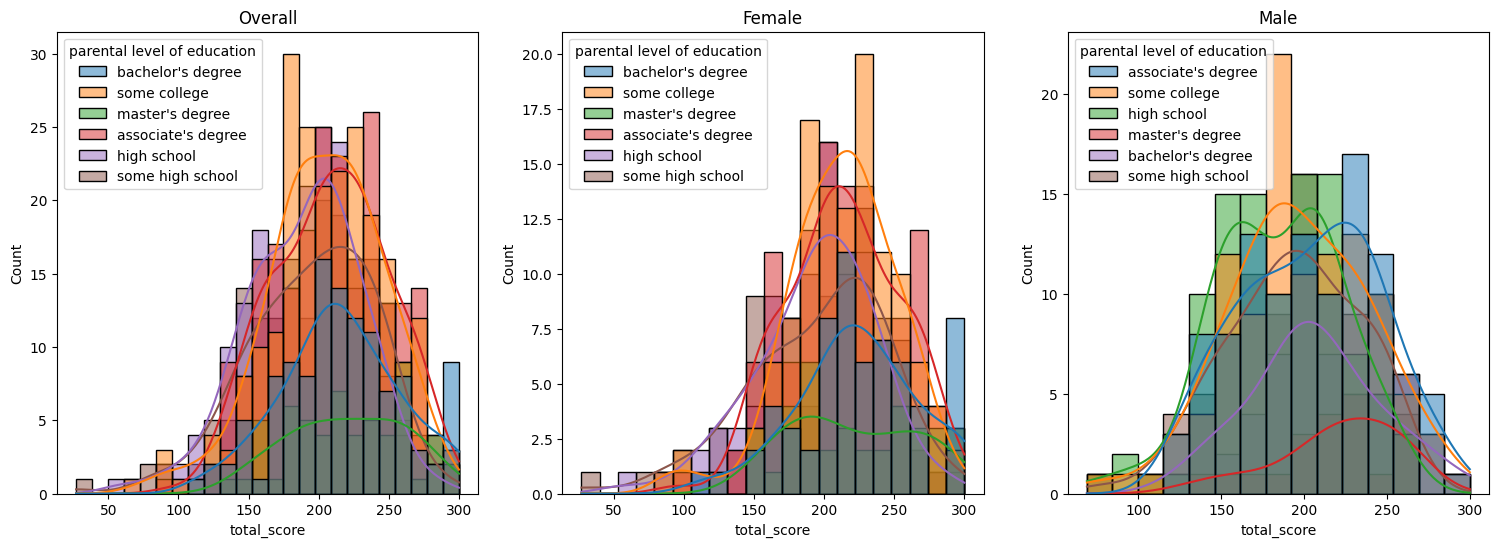

In [44]:
plots(x='total_score',hue='parental level of education')

# Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

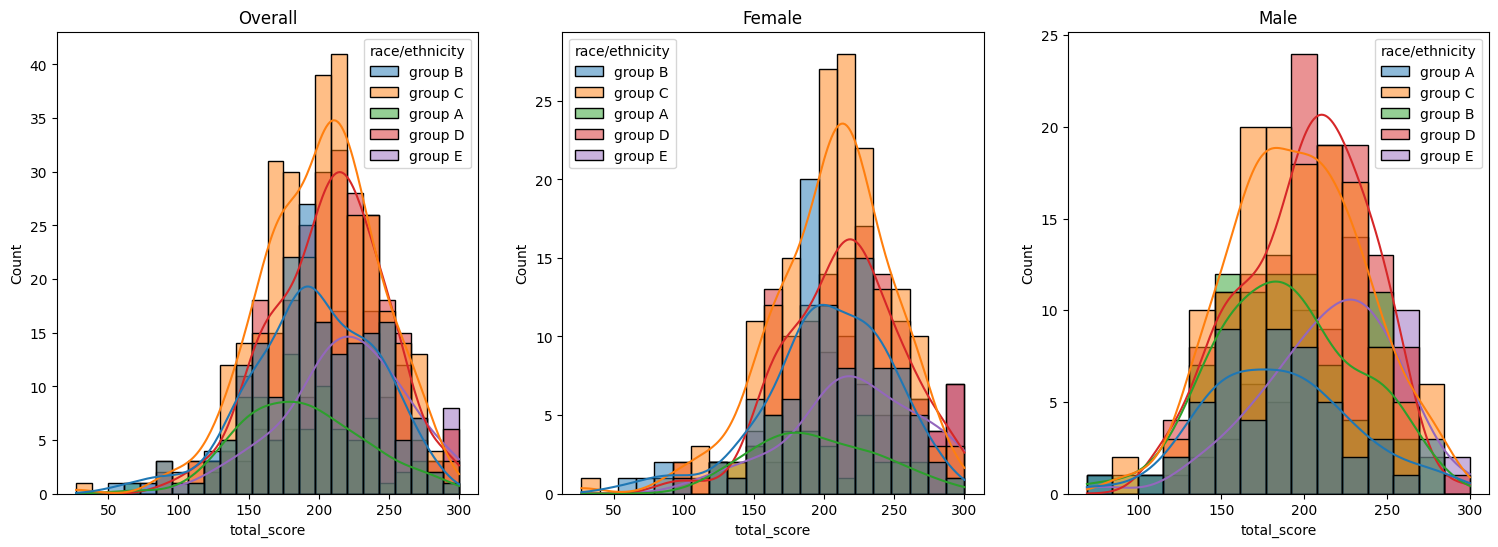

In [46]:
plots(x='total_score',hue='race/ethnicity')

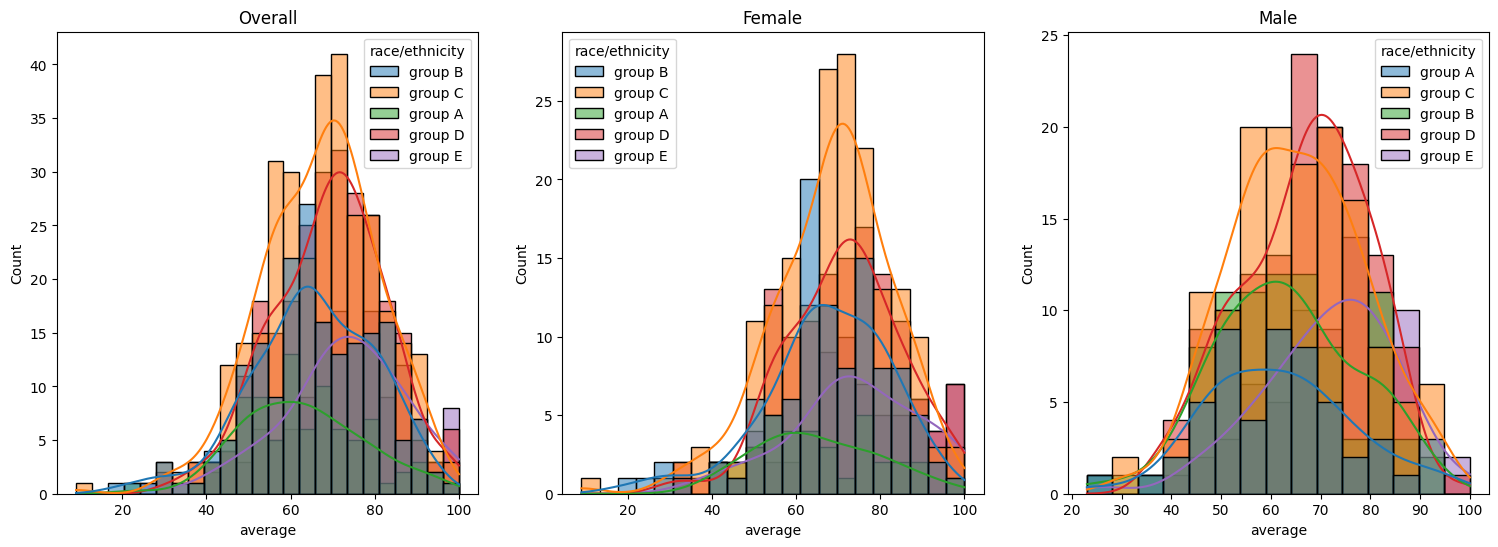

In [47]:
plots(x='average',hue='race/ethnicity')

# Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

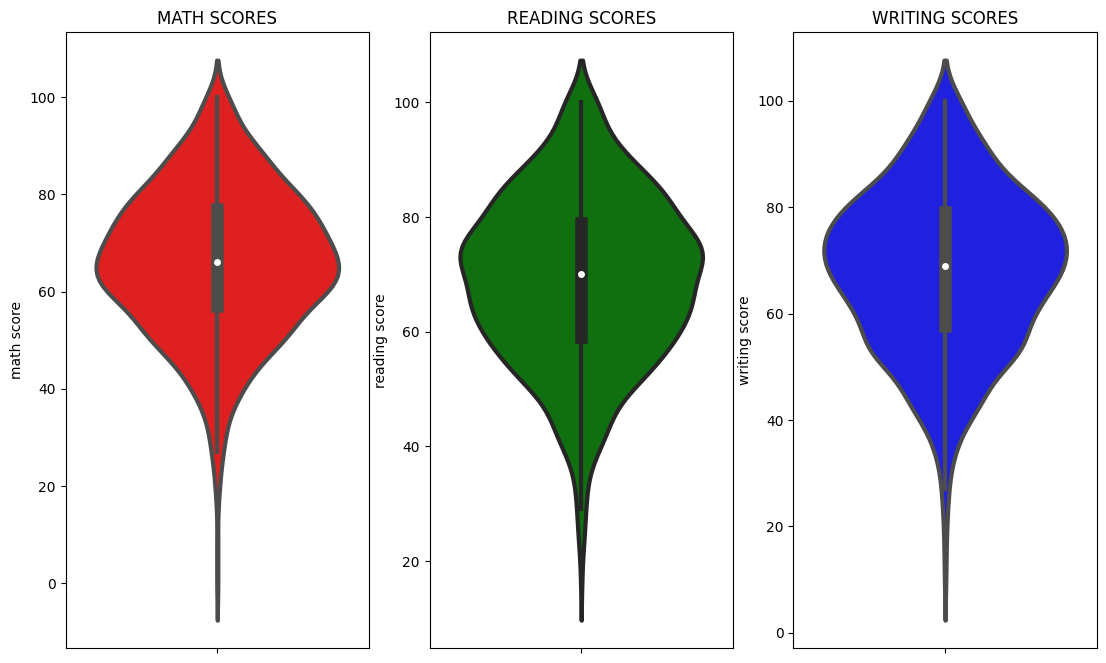

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

# Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

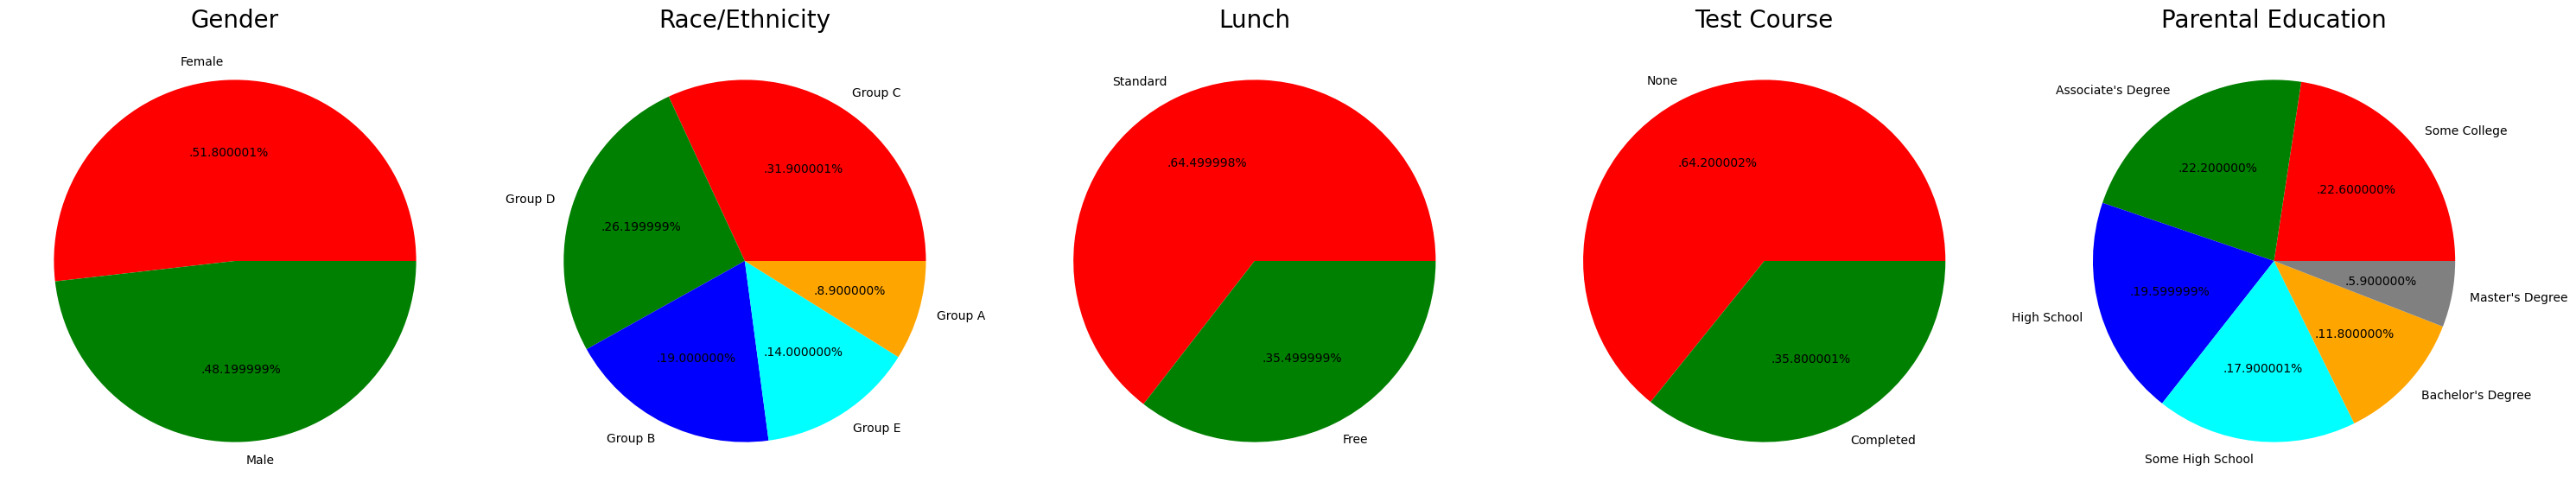

In [49]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [51]:

gender_group = data.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


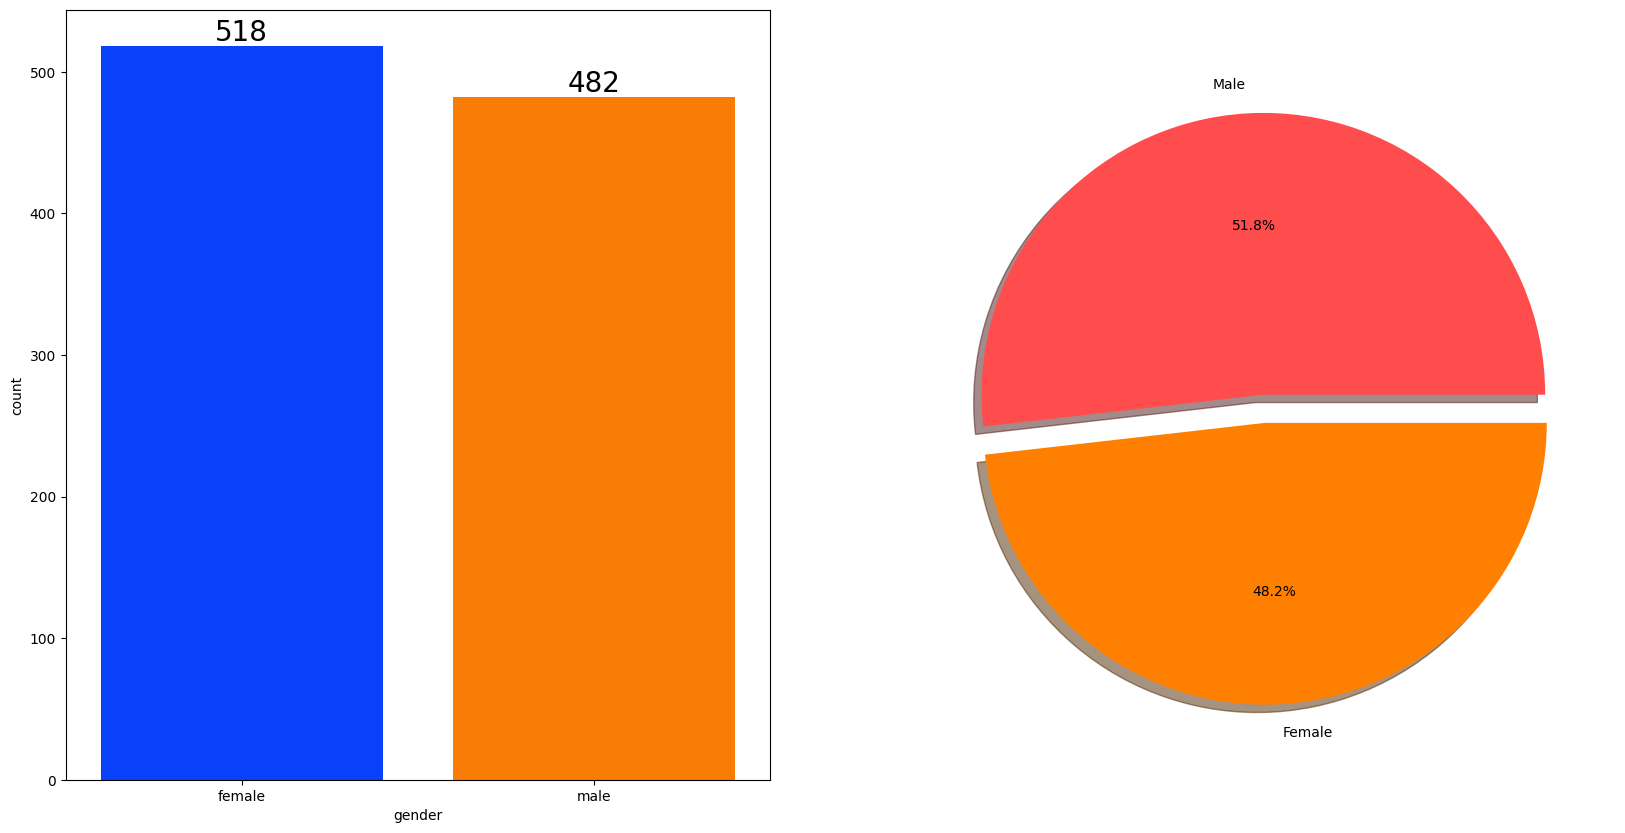

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

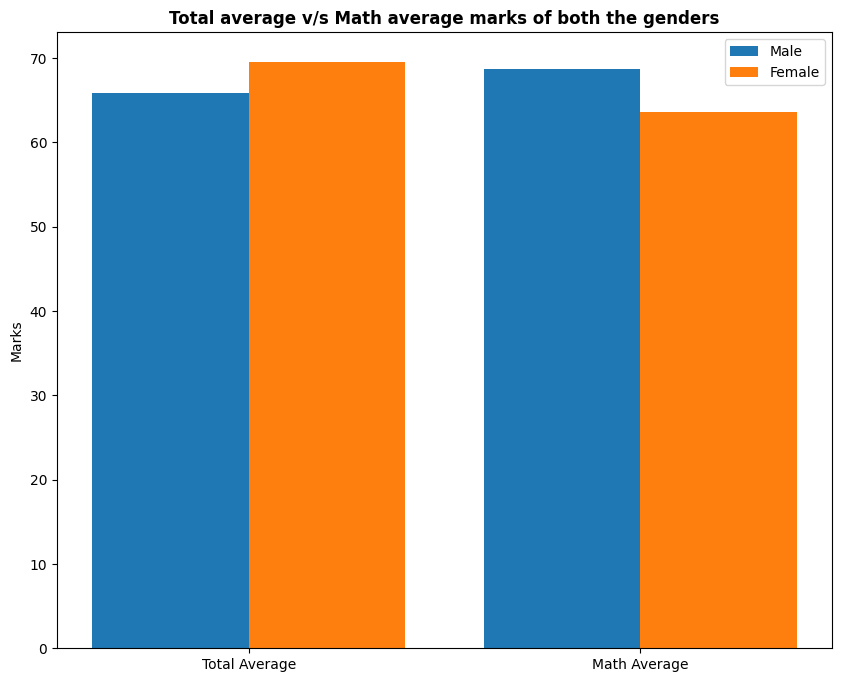

In [52]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

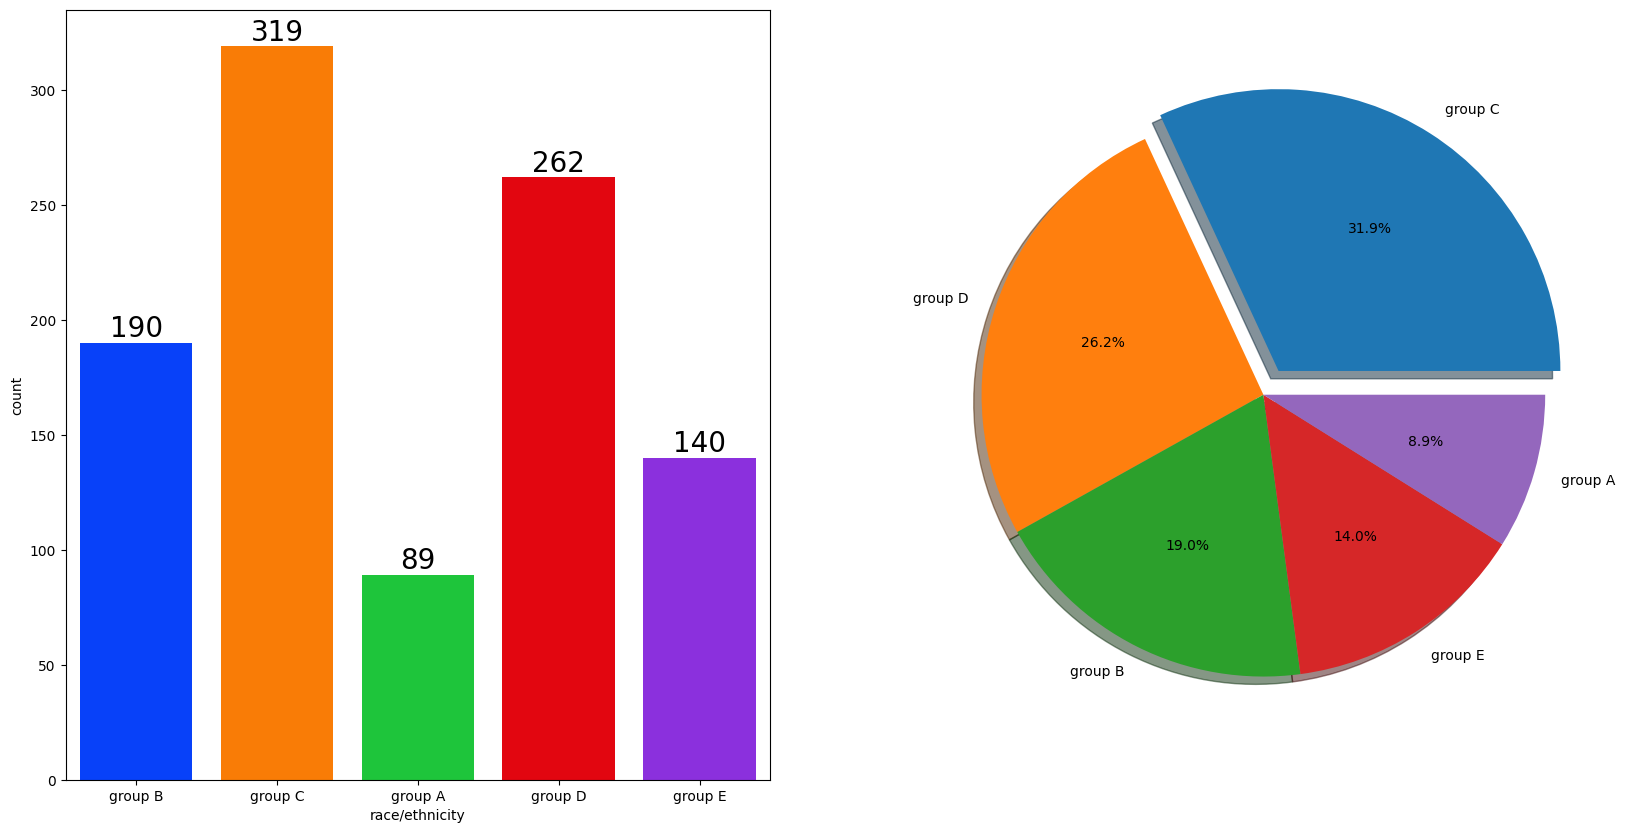

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

# Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

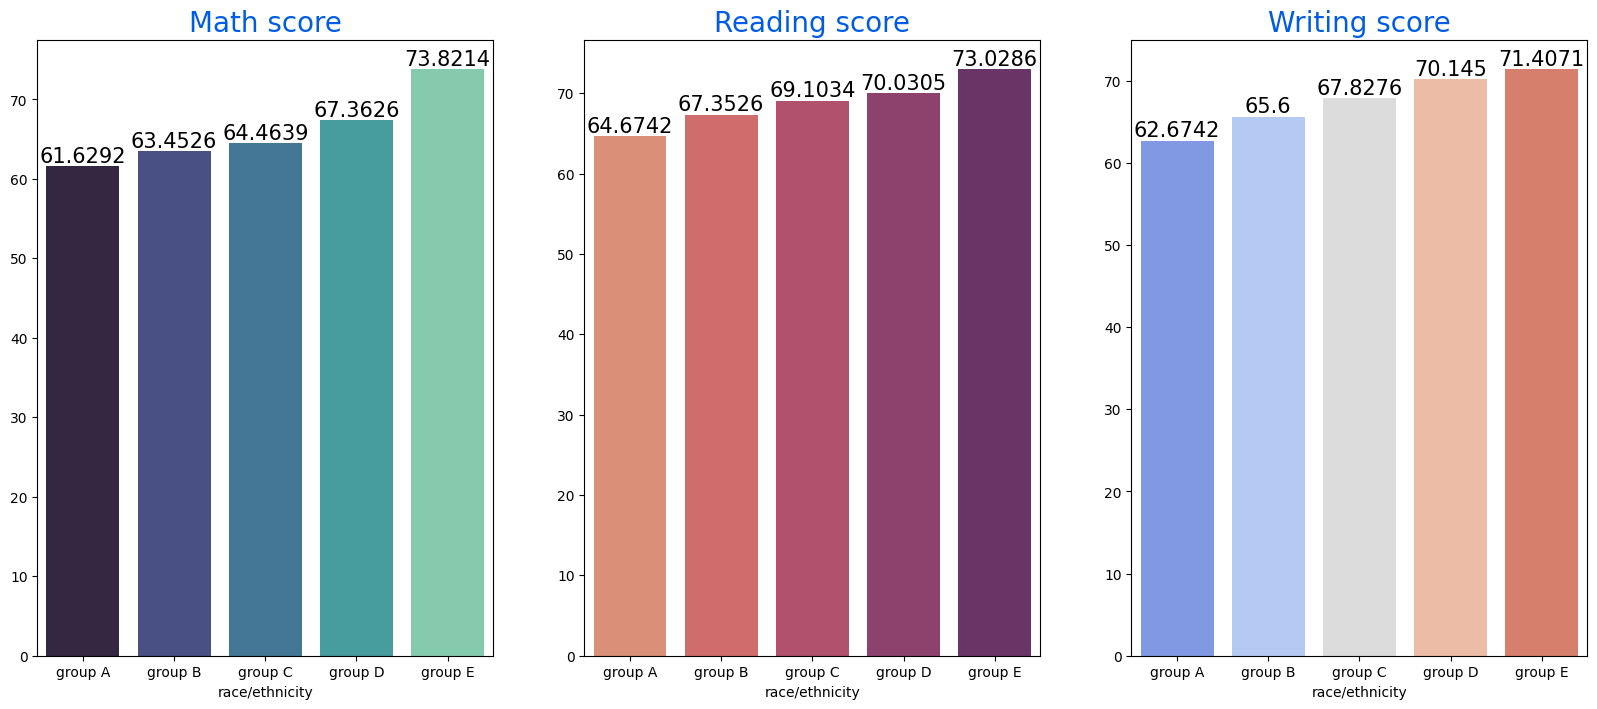

In [54]:

Group_data2=data.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

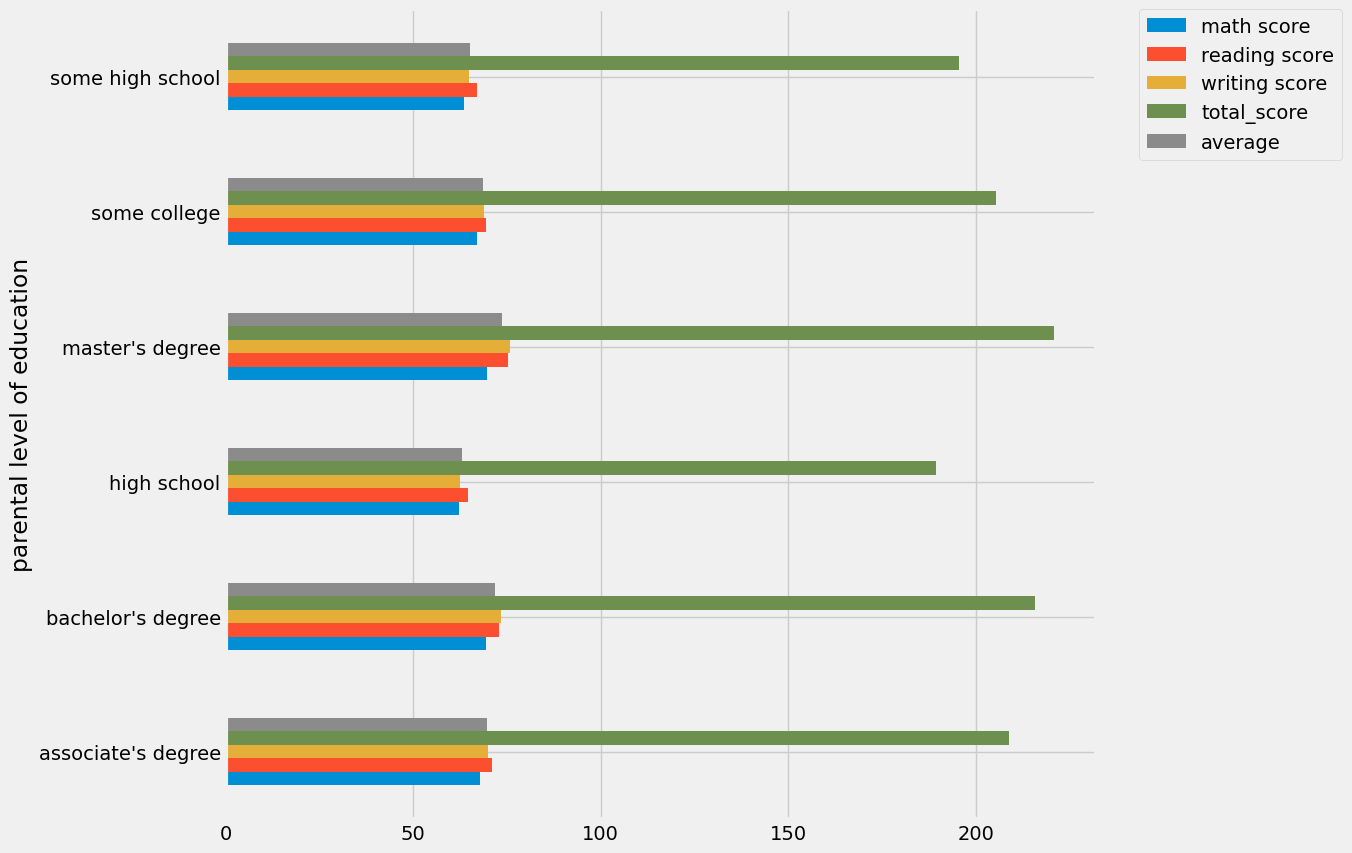

In [56]:
data.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

<Axes: xlabel='lunch', ylabel='writing score'>

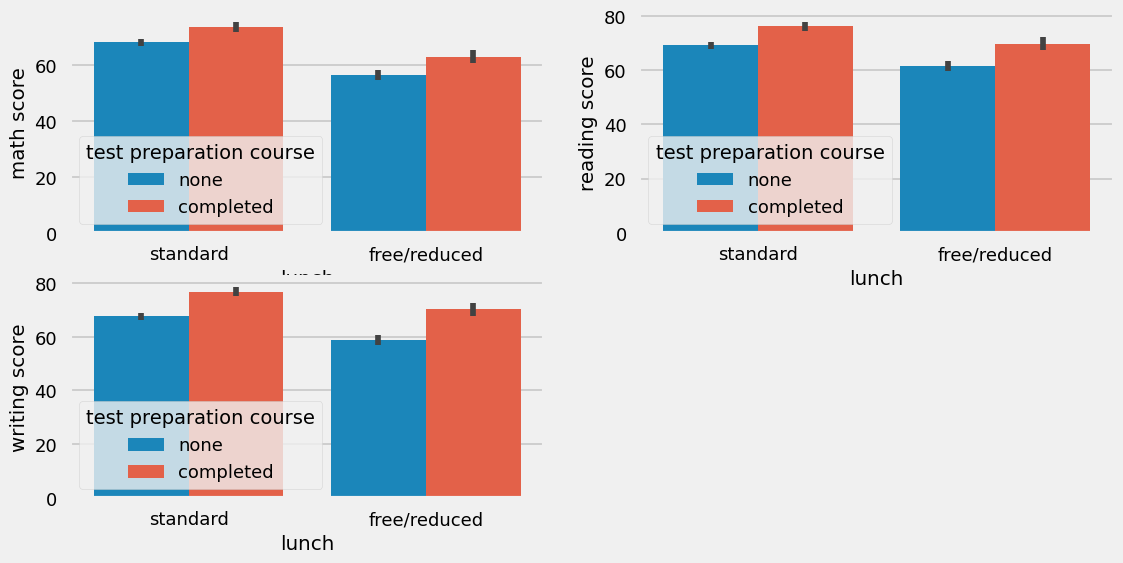

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math score'], hue=data['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading score'], hue=data['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing score'], hue=data['test preparation course']) 

# Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

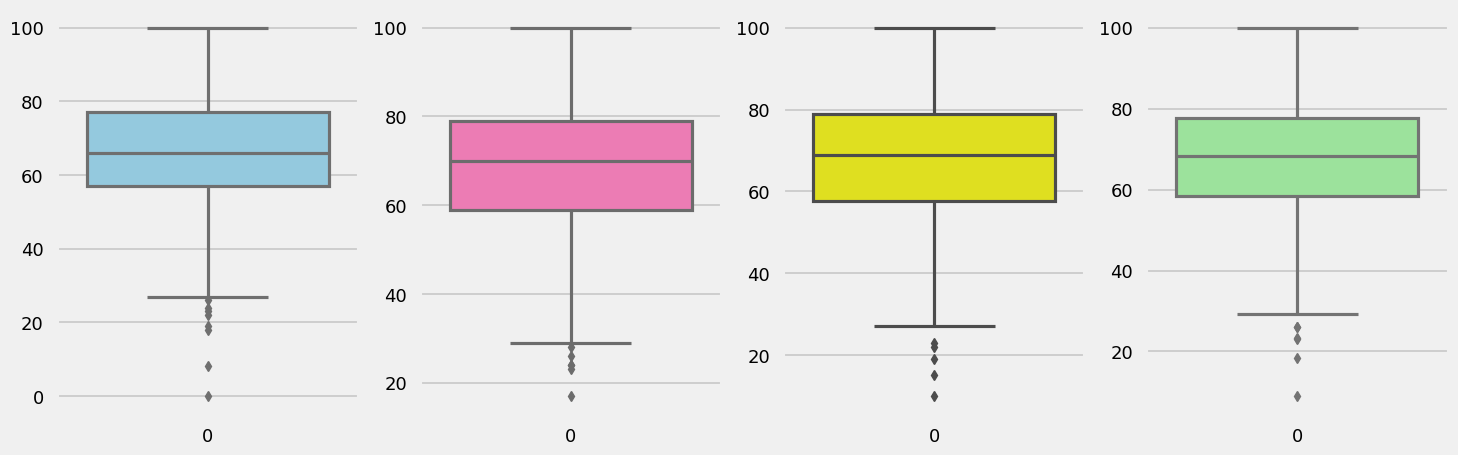

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

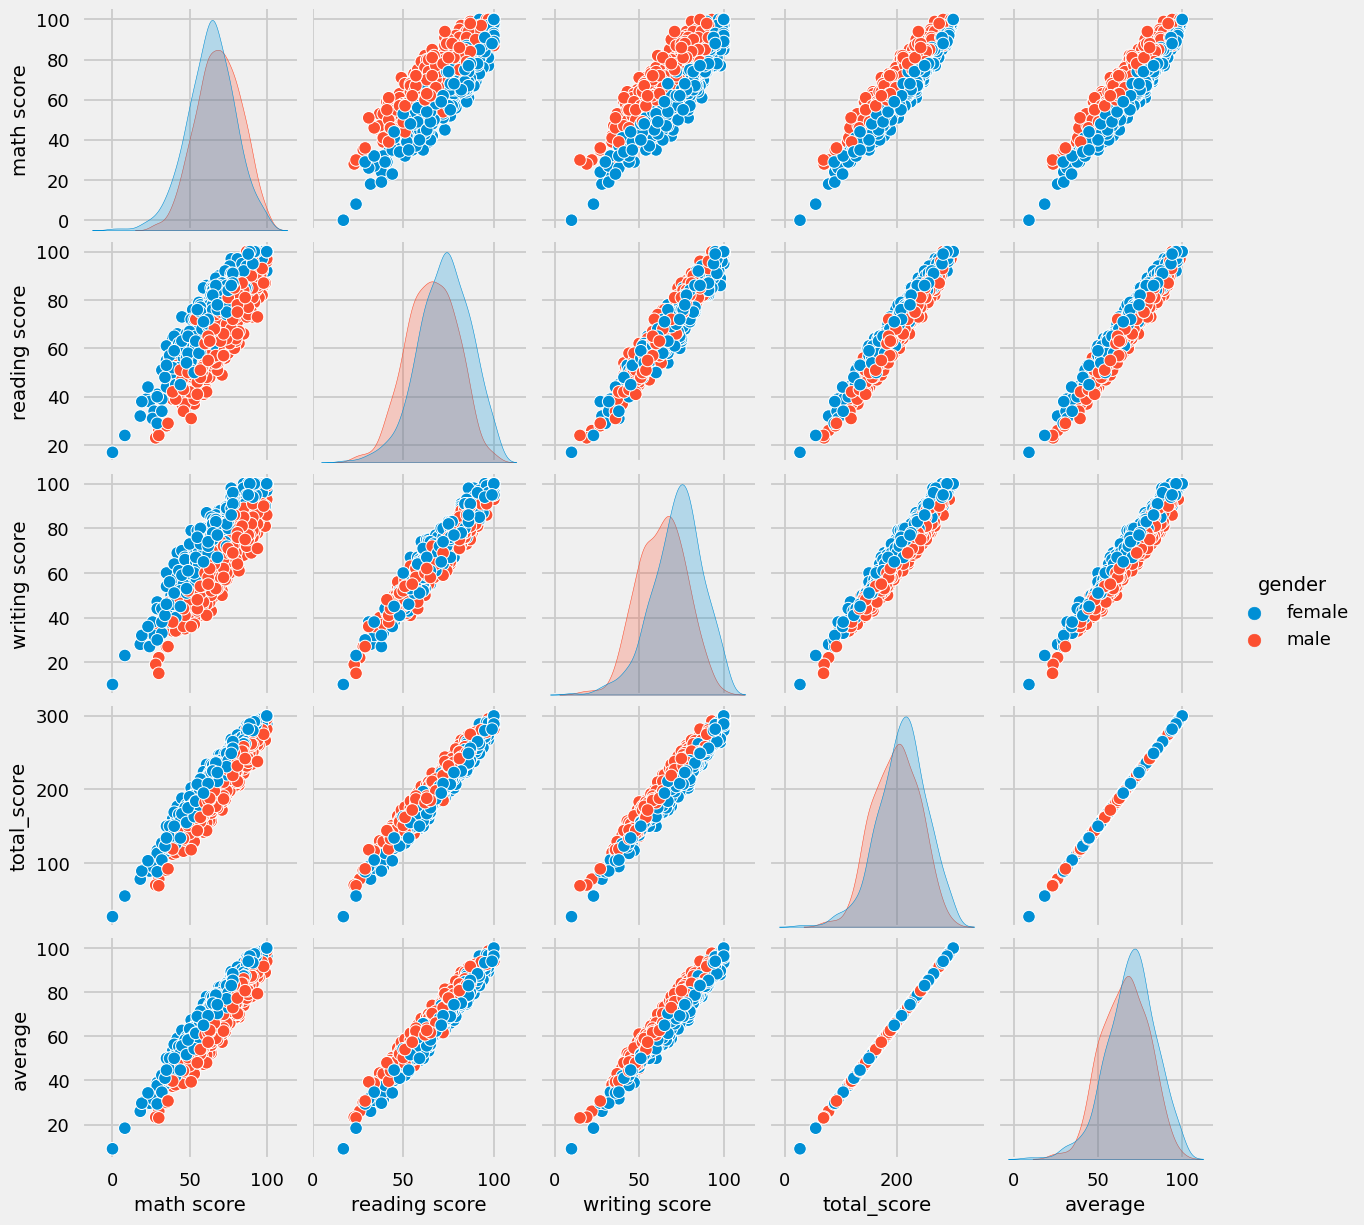

In [63]:
sns.pairplot(data,hue = 'gender')
plt.show()

# Insights
* From the above plot it is clear that all the scores increase linearly with each other.

# Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.